In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#from nbpep8.nbpep8 import pep8
from ast import literal_eval
from itertools import chain

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.model_selection import train_test_split
from torch import optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from tqdm.notebook import tqdm
from transformers import AutoModel, AutoTokenizer

In [ ]:
#display options
pd.set_option('display.max_colwidth', None)

# NBME - Score Clinical Patient Notes : analysis

In [ ]:
path_patient_note = ("patient_notes.csv")
patient_notes = pd.read_csv(path_patient_note)
#pep8(_ih)

In [ ]:
patient_notes.head(3)

,pn_num,case_num,pn_history
0,0,0,"17-year-old male, has come to the student health clinic complaining of heart pounding. Mr. Cleveland's mother has given verbal consent for a history, physical examination, and treatment\r\n-began 2-3 months ago,sudden,intermittent for 2 days(lasting 3-4 min),worsening,non-allev/aggrav\r\n-associated with dispnea on exersion and rest,stressed out about school\r\n-reports fe feels like his heart is jumping out of his chest\r\n-ros:denies chest pain,dyaphoresis,wt loss,chills,fever,nausea,vomiting,pedal edeam\r\n-pmh:non,meds :aderol (from a friend),nkda\r\n-fh:father had MI recently,mother has thyroid dz\r\n-sh:non-smoker,mariguana 5-6 months ago,3 beers on the weekend, basketball at school\r\n-sh:no std"
1,1,0,"17 yo male with recurrent palpitations for the past 3 mo lasting about 3 - 4 min, it happened about 5 - 6 times since the beginning. One time durign a baskeball game two days ago light headedness, pressure in the chest, catching breath, but no fainting. During teh episodes no sweating. No diarrhea, no heat intolerance, no weight loss. Has tried aterol to be able to better concentrate, has received it from his roommate. ."
2,2,0,"Dillon Cleveland is a 17 y.o. male patient with no significant PMH who presents with complaints of heart pounding. This has been going on for a few months and happens once or twice a month. He cannot think of any triggers, and it has occurred both with activity and at rest. Occasionally, it is accompanied by chest pressure but not pain that is located at the center of his chest. On one instance, he experienced chest pressure, lightheadedness and shortness of breath for 10 minutes with the heart pounding. \r\n\r\nOtherwise, he has not had shortness of breath, chest pain, anxiety, \r\n\r\nMedication: adderall twice a week as study aid (not prescribed)\r\nFH: mother - thyroid disease, father - heart attack at age 52, both living\r\nSH: no smoking; 3-4 drinks on the weekend per sitting; marijuanna once recently, no other recreational drugs"


In [ ]:
patient_notes.iloc[5000:5003, :]

,pn_num,case_num,pn_history
5000,22107,2,"44 yo F c/o irregular periods for 3 years\r\nLMP : 2 month ago, cyces every 3 week t o every 4 months, lasting about 2-6 days, flow ranging from light to heavy, with abdominal discomfort, breast tenderness 2 days before last menstrual period. no dyspareunia, no postcoidal bleeding, no vaginal bleeding, no vaginal discharge. no change in weight appetite. With occ hot flashes, vaginal drying and pruritus, sweating, palpitations. . no change in voice, no breast dischargfge, no visional changes. \r\nmed: HCTZ. NKDA. pmh: HTN 6 Y. Menarche: 14 . G2P2, uncomplicated vaginal birth.\r\nno smoking, occ ETOH, no rec drugs, no STD, sexually active with husband\r\n"
5001,22108,2,"This is a 44 year old G2P2 female presenting with a 3 year history of irregular periods. She notes that her periods have been unpredictable, and estimates she has been haivng 5-6 periods per year. The flow varies in heaviness. She also notes an episode 1 week ago of waking up drenched in sweat. She notes hot flashes and sweating in the daytime as well. She has had vaginal dryness during sex for the past year. She denies cramping, changes in weight, changes in hair/skin/nails, concentration or mood, or hot or cold intolerance. \r\nPMHx: HTN\r\nMedications: HCTZ\r\nSurgeries: None\r\nFamily history: noncontributory\r\nOb/gyn: 2 children, vaginal deliveries without complications. Pap smear 1 year ago was normal. Copper IUD was placed 4 years ago. Sexually active with husband.\r\nSocial: Non-smoker, drinks rarely, no drug use."
5002,22109,2,"44 yo f G2P2A0, complains of irregular periods for the past 3 years. her periods can appear between 3 weeks to 4 months, varies between 5-6 pads on heavy days to 2-3 pads on low days and can last 2-6 days. she further mentions hot flushes and vaginal dryness. denies menustral periods or abdominal periods. denies spotting between periods. unknown fibroid or any gynecological abnormality. PAP smear - a year ago and normal.mentions early morning awakening, denies mood change. she did not see an OBGYN for the past 3 years. she denies changes in bowel, GI, or urinary symptoms, and no change in weight or appetite. \r\nROS: None except above mentioned\r\nMEDS:HCTZ\r\nALLERGY: none\r\nPMH: HTN\r\nPSH: none\r\nSH: officer manager at an isurance company, rarely drinks, denies tobacco or drug use, sexually active with husband\r\nFH: non contributory, does not remember when her mother got menopausal."


In [ ]:
path_features = ("features.csv")
features = pd.read_csv(path_features)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   feature_num   143 non-null    int64 
 1   case_num      143 non-null    int64 
 2   feature_text  143 non-null    object
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


In [ ]:
features.head()

,feature_num,case_num,feature_text
0,0,0,Family-history-of-MI-OR-Family-history-of-myocardial-infarction
1,1,0,Family-history-of-thyroid-disorder
2,2,0,Chest-pressure
3,3,0,Intermittent-symptoms
4,4,0,Lightheaded


In [ ]:
features[features['case_num'] == 5]
#pep8(_ih)

,feature_num,case_num,feature_text
69,500,5,Onset-5-years-ago
70,501,5,Female
71,502,5,No-caffeine-use
72,503,5,Associated-SOB-OR-Associated-shortness-of-breath
73,504,5,Episodes-of-heart-racing
74,505,5,Recent-visit-to-emergency-department-with-negative-workup
75,506,5,No-chest-pain
76,507,5,No-illicit-drug-use
77,508,5,Associated-nausea
78,509,5,Increased-frequency-recently


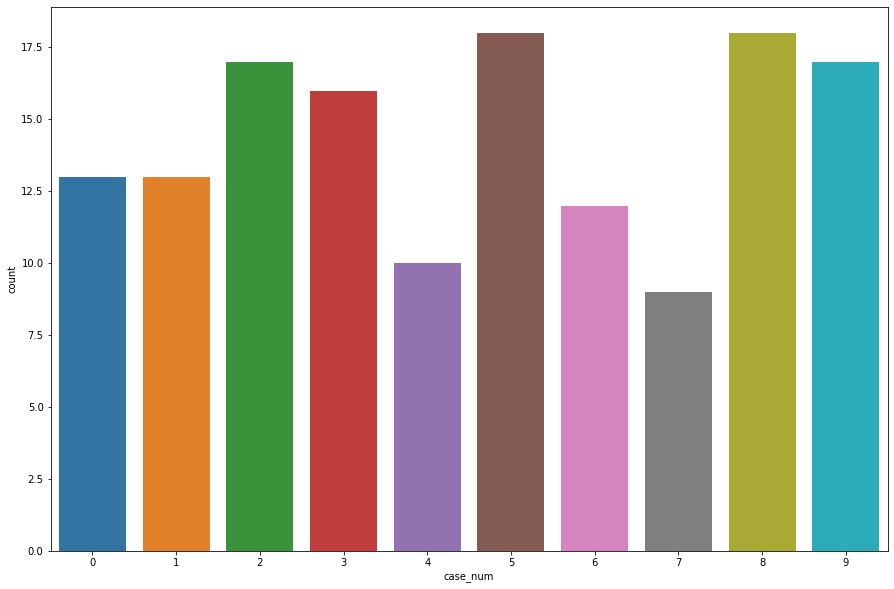

In [ ]:
sns.countplot(data=features, x='case_num')
plt.show()

In [ ]:
body = '-'.join(features['feature_text'].apply(lambda x: x.lower()).tolist())

(-0.5, 2999.5, 1999.5, -0.5)

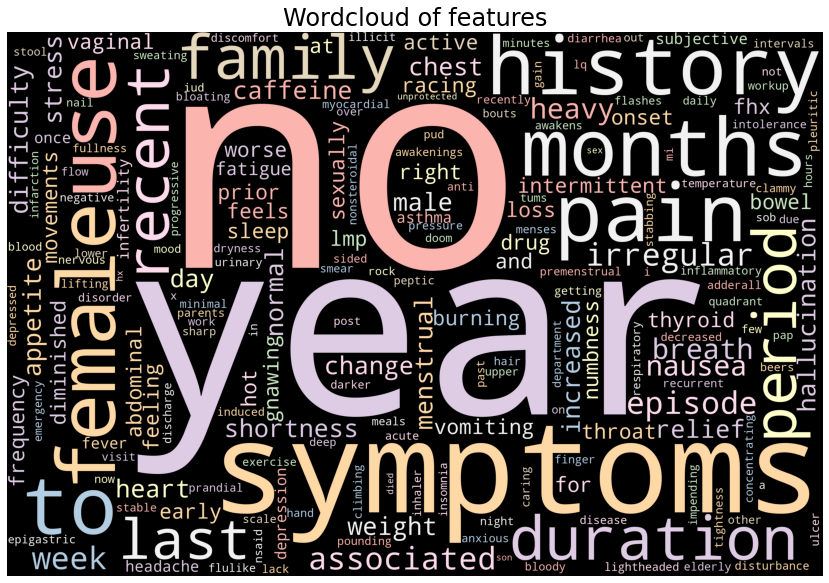

In [ ]:
# Import package
from wordcloud import WordCloud, STOPWORDS

# Generate word cloud
wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=1, 
                      background_color='black',
                      colormap='Pastel1',
                      collocations=False,
                      stopwords=['-', 'or', 'of', 'with', 'ago'])\
                      .generate(body)
# Plot
plt.rcParams["figure.figsize"] = (15, 10)
plt.imshow(wordcloud)
plt.title('Wordcloud of features', fontsize=24)
plt.axis('off')
#pep8(_ih)

In [ ]:

def process_feature_text(text):
    return text.replace("-OR-", ";-").replace("-", " ")


def prepare_datasets():
    features = pd.read_csv("features.csv")
    notes = pd.read_csv("patient_notes.csv")
    df = pd.read_csv("train.csv")
    df["annotation_list"] = [literal_eval(x) for x in df["annotation"]]
    df["location_list"] = [literal_eval(x) for x in df["location"]]

    merged = df.merge(notes, how="left")
    merged = merged.merge(features, how="left")

    merged["feature_text"] = [process_feature_text(x) for x in
                              merged["feature_text"]]
    merged["feature_text"] = merged["feature_text"].apply(lambda x: x.lower())
    merged["pn_history"] = merged["pn_history"].apply(lambda x: x.lower())

    return merged


#pep8(_ih)

In [ ]:
def loc_list_to_ints(loc_list):
    to_return = []
    for loc_str in loc_list:
        loc_strs = loc_str.split(";")
        for loc in loc_strs:
            start, end = loc.split()
            to_return.append((int(start), int(end)))
    return to_return


def tokenize_and_add_labels(tokenizer, data, config):
    out = tokenizer(
        data["feature_text"],
        data["pn_history"],
        truncation=config['truncation'],
        max_length=config['max_length'],
        padding=config['padding'],
        return_offsets_mapping=config['return_offsets_mapping']
    )
    labels = [0.0] * len(out["input_ids"])
    out["location_int"] = loc_list_to_ints(data["location_list"])
    out["sequence_ids"] = out.sequence_ids()

    for idx, (seq_id, offsets) in enumerate(zip(out["sequence_ids"],
                                                out["offset_mapping"])):
        if not seq_id or seq_id == 0:
            labels[idx] = -1
            continue

        token_start, token_end = offsets
        for feature_start, feature_end in out["location_int"]:
            if token_start >= feature_start and token_end <= feature_end:
                labels[idx] = 1.0
                break

    out["labels"] = labels

    return out


#pep8(_ih)

In [ ]:
def get_location_predictions(preds, offset_mapping, sequence_ids, test=False):
    all_predictions = []
    for pred, offsets, seq_ids in zip(preds, offset_mapping, sequence_ids):
        pred = 1 / (1 + np.exp(-pred))
        start_idx = None
        end_idx = None
        current_preds = []
        for pred, offset, seq_id in zip(pred, offsets, seq_ids):
            if seq_id is None or seq_id == 0:
                continue

            if pred > 0.5:
                if start_idx is None:
                    start_idx = offset[0]
                end_idx = offset[1]
            elif start_idx is not None:
                if test:
                    current_preds.append(f"{start_idx} {end_idx}")
                else:
                    current_preds.append((start_idx, end_idx))
                start_idx = None
        if test:
            all_predictions.append("; ".join(current_preds))
        else:
            all_predictions.append(current_preds)
            
    return all_predictions



def calculate_char_cv(predictions, offset_mapping, sequence_ids, labels):
    all_labels = []
    all_preds = []
    for preds, offsets, seq_ids, labels in zip(predictions, offset_mapping,
                                               sequence_ids, labels):

        num_chars = max(list(chain(*offsets)))
        char_labels = np.zeros(num_chars)

        for o, s_id, label in zip(offsets, seq_ids, labels):
            if s_id is None or s_id == 0:
                continue
            if int(label) == 1:
                char_labels[o[0]:o[1]] = 1

        char_preds = np.zeros(num_chars)

        for start_idx, end_idx in preds:
            char_preds[start_idx:end_idx] = 1
            
        all_labels.extend(char_labels)
        all_preds.extend(char_preds)

      #  print(all_labels)
       # print("------------------------------------------------------------------------------------------")
       # print("Predictionss---------------------------------------------")
       # print(all_preds)

    results = precision_recall_fscore_support(all_labels,
                                              all_preds,
                                              average="binary",
                                              labels=np.unique(all_preds))
    accuracy = accuracy_score(all_labels, all_preds)
    

    return {
        "Accuracy": accuracy,
        "precision": results[0],
        "recall": results[1],
        "f1": results[2]
    }


#pep8(_ih)

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, data, tokenizer, config):
        self.data = data
        self.tokenizer = tokenizer
        self.config = config

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        data = self.data.iloc[idx]
        tokens = tokenize_and_add_labels(self.tokenizer, data, self.config)

        input_ids = np.array(tokens["input_ids"])
        attention_mask = np.array(tokens["attention_mask"])
        token_type_ids = np.array(tokens["token_type_ids"])

        labels = np.array(tokens["labels"])
        offset_mapping = np.array(tokens['offset_mapping'])
        sequence_ids = np.array(tokens['sequence_ids']).astype("float16")
        
        return input_ids, attention_mask, token_type_ids, labels, offset_mapping, sequence_ids

In [ ]:
#Architecture for PubMed BERT was downloaded at https://www.kaggle.com/jpmiller/layoutlm
import torch.nn.functional as F


class CustomModel(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.bert = AutoModel.from_pretrained(config['model_name']) 
        self.dropout = nn.Dropout(p=config['dropout'])
        self.config = config
        self.fc1 = nn.Linear(768, 512)
        self.fc2 = nn.Linear(512, 1)
        

    def forward(self, input_ids, attention_mask, token_type_ids):
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask,
                            token_type_ids=token_type_ids)
        logits = F.relu(self.fc1(outputs[0]))
        logits = self.fc2(self.dropout(logits)).squeeze(-1)
        return logits
    
    
#pep8(_ih)

In [ ]:
hyperparameters = {
    "max_length": 416,
    "padding": "max_length",
    "return_offsets_mapping": True,
    "truncation": "only_second",
    "model_name": ("drive/MyDrive/DL Project/Bio_ClinicalBERT"),
    "dropout": 0.2,
    "lr": 1e-5,
    "test_size": 0.2,
    "seed": 1268,
    "batch_size": 8
}
#pep8(_ih)

In [ ]:
train_df = prepare_datasets()

X_train, X_test = train_test_split(train_df,
                                   test_size=hyperparameters['test_size'],
                                   random_state=hyperparameters['seed'])


print("Train size", len(X_train))
print("Test Size", len(X_test))
#pep8(_ih)

Train size 11440
Test Size 2860


In [ ]:
tokenizer = AutoTokenizer.from_pretrained(hyperparameters['model_name'])

training_data = CustomDataset(X_train,
                              tokenizer,
                              hyperparameters)

train_dataloader = DataLoader(training_data,
                              batch_size=hyperparameters['batch_size'],
                              shuffle=True)

test_data = CustomDataset(X_test, tokenizer, hyperparameters)

test_dataloader = DataLoader(test_data,
                             batch_size=hyperparameters['batch_size'],
                             shuffle=False)

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

model = CustomModel(hyperparameters).to(DEVICE)

criterion = torch.nn.BCEWithLogitsLoss(reduction="none")
optimizer = optim.AdamW(model.parameters(), lr=hyperparameters['lr'])
#pep8(_ih)

In [ ]:
def train_model(model, dataloader, optimizer, criterion):
        model.train()
        train_loss = []

        for batch in tqdm(dataloader):
            optimizer.zero_grad()
            input_ids = batch[0].to(DEVICE)
            attention_mask = batch[1].to(DEVICE)
            token_type_ids = batch[2].to(DEVICE)
            labels = batch[3].to(DEVICE)

            logits = model(input_ids,
                           attention_mask,
                           token_type_ids)
            loss = criterion(logits, labels)
            # since, we have
            loss = torch.masked_select(loss, labels > -1.0).mean()
            train_loss.append(loss.item() * input_ids.size(0))
            loss.backward()
            # clip the the gradients to 1.0.
            #It helps in preventing the exploding gradient problem
            # it's also improve f1 accuracy slightly
            nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()

        return sum(train_loss)/len(train_loss)

    
#pep8(_ih)

In [ ]:
def eval_model(model, dataloader, criterion):
        model.eval()
        valid_loss = []
        preds = []
        offsets = []
        seq_ids = []
        valid_labels = []

        for batch in tqdm(dataloader):
            input_ids = batch[0].to(DEVICE)
            attention_mask = batch[1].to(DEVICE)
            token_type_ids = batch[2].to(DEVICE)
            labels = batch[3].to(DEVICE)
            offset_mapping = batch[4]
            sequence_ids = batch[5]

            logits = model(input_ids, attention_mask, token_type_ids)
            loss = criterion(logits, labels)
            loss = torch.masked_select(loss, labels > -1.0).mean()
            valid_loss.append(loss.item() * input_ids.size(0))

            preds.append(logits.detach().cpu().numpy())
            offsets.append(offset_mapping.numpy())
            seq_ids.append(sequence_ids.numpy())
            valid_labels.append(labels.detach().cpu().numpy())

        preds = np.concatenate(preds, axis=0)
        offsets = np.concatenate(offsets, axis=0)
        seq_ids = np.concatenate(seq_ids, axis=0)
        valid_labels = np.concatenate(valid_labels, axis=0)
        location_preds = get_location_predictions(preds,
                                                  offsets,
                                                  seq_ids,
                                                  test=False)
        score = calculate_char_cv(location_preds,
                                  offsets,
                                  seq_ids,
                                  valid_labels)

        return sum(valid_loss)/len(valid_loss), score


#pep8(_ih)

In [ ]:
import time

train_loss_data, valid_loss_data, valid_loss_train_data = [], [],[]
score_data_list,score_train_data_list = [], []
valid_loss_min = np.Inf
since = time.time()
epochs = 5

In [ ]:
%time
best_loss = np.inf

for i in range(epochs):
    print("Epoch: {}/{}".format(i + 1, epochs))
    # first train model
    train_loss = train_model(model, train_dataloader, optimizer, criterion)
    train_loss_data.append(train_loss)
    print(f"Train loss: {train_loss}")
    # evaluate model
    valid_loss, score = eval_model(model, test_dataloader, criterion)
    valid_loss_data.append(valid_loss)
    score_data_list.append(score)
    print(f"Valid test loss: {valid_loss}")
    print(f"Valid test score: {score}")

    valid_loss_train, train_score = eval_model(model, train_dataloader, criterion)
    valid_loss_train_data.append(valid_loss_train)
    score_train_data_list.append(train_score)
    print(f"Valid train loss: {valid_loss}")
    print(f"Valid train score: {train_score}")
    
    if valid_loss < best_loss:
        best_loss = valid_loss
        torch.save(model.state_dict(), "drive/MyDrive/DL Project/Bio_ClinicalBERT/biobert.pth")

    
time_elapsed = time.time() - since
print('Training completed in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

Epoch: 1/5


  0%|          | 0/1430 [00:00<?, ?it/s]

Train loss: 0.3261577069709487


  0%|          | 0/358 [00:00<?, ?it/s]

Valid test loss: 0.16015125256975804
Valid test score: {'Accuracy': 0.9917447163619636, 'precision': 0.7051244195098382, 'recall': 0.7593443760298326, 'f1': 0.7312306878601453}


  0%|          | 0/1430 [00:00<?, ?it/s]

Valid train loss: 0.16015125256975804
Valid train score: {'Accuracy': 0.9929829443633577, 'precision': 0.7397465329520587, 'recall': 0.8047480301735784, 'f1': 0.7708794571813302}
Epoch: 2/5


  0%|          | 0/1430 [00:00<?, ?it/s]

Train loss: 0.13222192667255567


  0%|          | 0/358 [00:00<?, ?it/s]

Valid test loss: 0.12710305934797575
Valid test score: {'Accuracy': 0.992984077691154, 'precision': 0.7376980599278355, 'recall': 0.8155985314948111, 'f1': 0.7746948749982838}


  0%|          | 0/1430 [00:00<?, ?it/s]

Valid train loss: 0.12710305934797575
Valid train score: {'Accuracy': 0.9945826132466808, 'precision': 0.7790969726739226, 'recall': 0.8802696051584259, 'f1': 0.8265990091371951}
Epoch: 3/5


  0%|          | 0/1430 [00:00<?, ?it/s]

Train loss: 0.0955062660363882


  0%|          | 0/358 [00:00<?, ?it/s]

Valid test loss: 0.1179903622337263
Valid test score: {'Accuracy': 0.9932824820401623, 'precision': 0.7404850461099506, 'recall': 0.8402566993322348, 'f1': 0.7872222297452841}


  0%|          | 0/1430 [00:00<?, ?it/s]

Valid train loss: 0.1179903622337263
Valid train score: {'Accuracy': 0.9954999538330461, 'precision': 0.7999898876262467, 'recall': 0.9243104694722545, 'f1': 0.8576684747071958}
Epoch: 4/5


  0%|          | 0/1430 [00:00<?, ?it/s]

Train loss: 0.07293086507133531


  0%|          | 0/358 [00:00<?, ?it/s]

Valid test loss: 0.11762679120497026
Valid test score: {'Accuracy': 0.993544975264075, 'precision': 0.7450842343474982, 'recall': 0.8565894834215014, 'f1': 0.7969554751691029}


  0%|          | 0/1430 [00:00<?, ?it/s]

Valid train loss: 0.11762679120497026
Valid train score: {'Accuracy': 0.9960940186265984, 'precision': 0.8113758351824075, 'recall': 0.9559518332712628, 'f1': 0.8777503243563998}
Epoch: 5/5


  0%|          | 0/1430 [00:00<?, ?it/s]

Train loss: 0.057604764981308974


  0%|          | 0/358 [00:00<?, ?it/s]

Valid test loss: 0.1252650583932234
Valid test score: {'Accuracy': 0.9935295847818912, 'precision': 0.7496407677306784, 'recall': 0.8445350215361489, 'f1': 0.7942635764290084}


  0%|          | 0/1430 [00:00<?, ?it/s]

Valid train loss: 0.1252650583932234
Valid train score: {'Accuracy': 0.9966320618033048, 'precision': 0.8324876615968383, 'recall': 0.9644664490547024, 'f1': 0.8936304094833417}
Training completed in 107m 37s


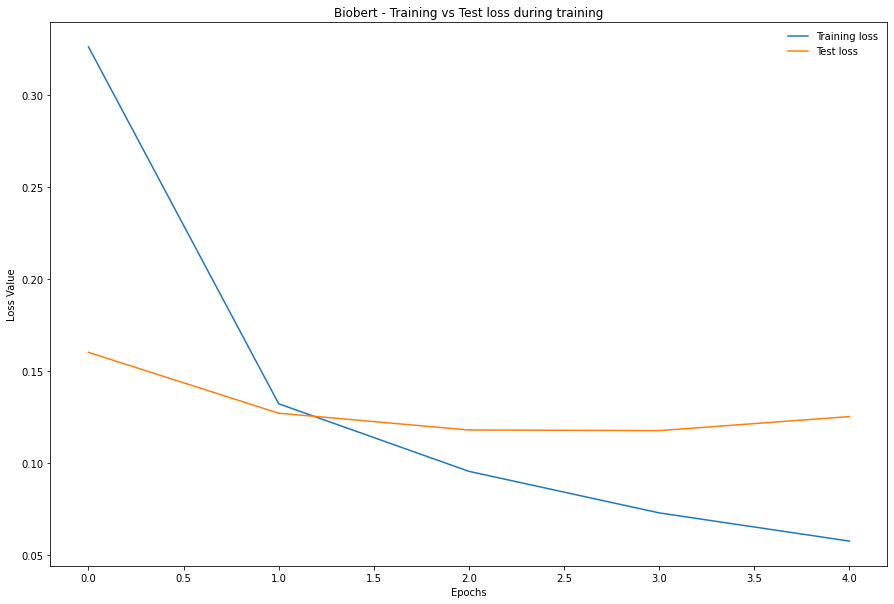

In [ ]:
from matplotlib import pyplot as plt

plt.plot(train_loss_data, label="Training loss")
plt.plot(valid_loss_data, label="Test loss")
plt.title("Biobert - Training vs Test loss during training")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(frameon=False)

In [ ]:
# dictionary of lists  
loss_dict = {'train_loss': train_loss_data, 'valid_test_loss' : valid_loss_data, 'valid_train_loss' : valid_loss_train_data}  
       
df = pd.DataFrame(loss_dict) 
    
# saving the dataframe 
df.to_csv('drive/MyDrive/DL Project/Bio_ClinicalBERT/Loss_data_bio.csv') 

In [ ]:
import pandas as pd

score_df = pd.DataFrame.from_dict(score_data_list)
score_df_train = pd.DataFrame.from_dict(score_train_data_list)
score_df

,Accuracy,precision,recall,f1
0,0.991745,0.705124,0.759344,0.731231
1,0.992984,0.737698,0.815599,0.774695
2,0.993282,0.740485,0.840257,0.787222
3,0.993545,0.745084,0.856589,0.796955
4,0.993530,0.749641,0.844535,0.794264


In [ ]:
score_df = score_df.drop(labels=0, axis=0)

In [ ]:
score_df
while True:
  i = 0
  i = i+1

,Accuracy,precision,recall,f1
1,0.992984,0.737698,0.815599,0.774695
2,0.993282,0.740485,0.840257,0.787222
3,0.993545,0.745084,0.856589,0.796955
4,0.993530,0.749641,0.844535,0.794264


In [ ]:
score_df.to_csv('drive/MyDrive/DL Project/Bio_ClinicalBERT/Test_data_scores_bio.csv')

In [ ]:
score_df_train

,Accuracy,precision,recall,f1
0,0.992983,0.739747,0.804748,0.770879
1,0.994583,0.779097,0.880270,0.826599
2,0.995500,0.799990,0.924310,0.857668
3,0.996094,0.811376,0.955952,0.877750
4,0.996632,0.832488,0.964466,0.893630


In [ ]:
score_df_train = score_df_train.drop(labels=0, axis=0)

In [ ]:
score_df_train.to_csv('drive/MyDrive/DL Project/Bio_ClinicalBERT/Train_data_scores_bio.csv')

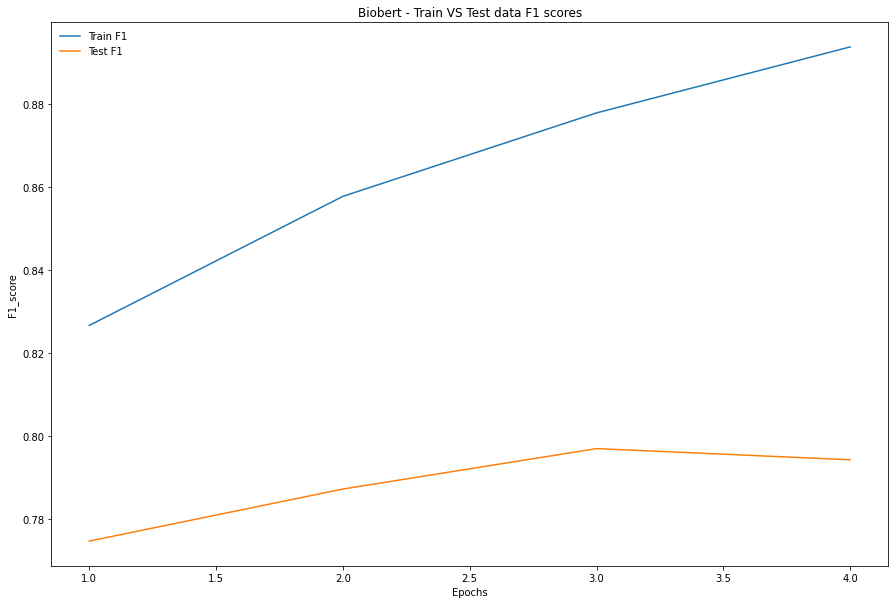

In [ ]:
plt.plot(score_df_train["f1"], label="Train F1")
plt.plot(score_df["f1"], label="Test F1")
plt.title("Biobert - Train VS Test data F1 scores")
plt.xlabel("Epochs")
plt.ylabel("F1_score")
plt.legend(frameon=False)

Loading best model

In [ ]:
model.load_state_dict(torch.load("drive/MyDrive/DL Project/Bio_ClinicalBERT/biobert.pth", map_location = DEVICE))

<All keys matched successfully>

In [ ]:
def create_test_df():
    feats = pd.read_csv("features.csv")
    notes = pd.read_csv("patient_notes.csv")
    test = pd.read_csv("test.csv")

    merged = test.merge(notes, how="left")
    merged = merged.merge(feats, how="left")

    def process_feature_text(text):
        return text.replace("-OR-", ";-").replace("-", " ")
    
    merged["feature_text"] = [process_feature_text(x) 
                              for x in merged["feature_text"]]
    
    return merged


class SubmissionDataset(Dataset):
    def __init__(self, data, tokenizer, config):
        self.data = data
        self.tokenizer = tokenizer
        self.config = config
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        example = self.data.iloc[idx]
        tokenized = self.tokenizer(
            example["feature_text"],
            example["pn_history"],
            truncation = self.config['truncation'],
            max_length = self.config['max_length'],
            padding = self.config['padding'],
            return_offsets_mapping = self.config['return_offsets_mapping']
        )
        tokenized["sequence_ids"] = tokenized.sequence_ids()

        input_ids = np.array(tokenized["input_ids"])
        attention_mask = np.array(tokenized["attention_mask"])
        token_type_ids = np.array(tokenized["token_type_ids"])
        offset_mapping = np.array(tokenized["offset_mapping"])
        sequence_ids = np.array(tokenized["sequence_ids"])\
                        .astype("float16")

        return input_ids, attention_mask, token_type_ids, offset_mapping, sequence_ids


test_df = create_test_df()

submission_data = SubmissionDataset(test_df, tokenizer, hyperparameters)
submission_dataloader = DataLoader(submission_data,
                                   batch_size=hyperparameters['batch_size'],
                                   shuffle=False)

#pep8(_ih)

In [ ]:
test_df

,id,case_num,pn_num,feature_num,pn_history,feature_text
0,00016_000,0,16,0,"HPI: 17yo M presents with palpitations. Patient reports 3-4 months of intermittent episodes of ""heart beating/pounding out of my chest."" 2 days ago during a soccer game had an episode, but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). Of note patient endorses abusing adderall, primarily to study (1-3 times per week). Before recent soccer game, took adderrall night before and morning of game. Denies shortness of breath, diaphoresis, fevers, chills, headache, fatigue, changes in sleep, changes in vision/hearing, abdominal paun, changes in bowel or urinary habits. \r\nPMHx: none\r\nRx: uses friends adderrall\r\nFHx: mom with ""thyroid disease,"" dad with recent heart attcak\r\nAll: none\r\nImmunizations: up to date\r\nSHx: Freshmen in college. Endorses 3-4 drinks 3 nights / week (on weekends), denies tabacco, endorses trying marijuana. Sexually active with girlfriend x 1 year, uses condoms",Family history of MI; Family history of myocardial infarction
1,00016_001,0,16,1,"HPI: 17yo M presents with palpitations. Patient reports 3-4 months of intermittent episodes of ""heart beating/pounding out of my chest."" 2 days ago during a soccer game had an episode, but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). Of note patient endorses abusing adderall, primarily to study (1-3 times per week). Before recent soccer game, took adderrall night before and morning of game. Denies shortness of breath, diaphoresis, fevers, chills, headache, fatigue, changes in sleep, changes in vision/hearing, abdominal paun, changes in bowel or urinary habits. \r\nPMHx: none\r\nRx: uses friends adderrall\r\nFHx: mom with ""thyroid disease,"" dad with recent heart attcak\r\nAll: none\r\nImmunizations: up to date\r\nSHx: Freshmen in college. Endorses 3-4 drinks 3 nights / week (on weekends), denies tabacco, endorses trying marijuana. Sexually active with girlfriend x 1 year, uses condoms",Family history of thyroid disorder
2,00016_002,0,16,2,"HPI: 17yo M presents with palpitations. Patient reports 3-4 months of intermittent episodes of ""heart beating/pounding out of my chest."" 2 days ago during a soccer game had an episode, but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). Of note patient endorses abusing adderall, primarily to study (1-3 times per week). Before recent soccer game, took adderrall night before and morning of game. Denies shortness of breath, diaphoresis, fevers, chills, headache, fatigue, changes in sleep, changes in vision/hearing, abdominal paun, changes in bowel or urinary habits. \r\nPMHx: none\r\nRx: uses friends adderrall\r\nFHx: mom with ""thyroid disease,"" dad with recent heart attcak\r\nAll: none\r\nImmunizations: up to date\r\nSHx: Freshmen in college. Endorses 3-4 drinks 3 nights / week (on weekends), denies tabacco, endorses trying marijuana. Sexually active with girlfriend x 1 year, uses condoms",Chest pressure
3,00016_003,0,16,3,"HPI: 17yo M presents with palpitations. Patient reports 3-4 months of intermittent episodes of ""heart beating/pounding out of my chest."" 2 days ago during a soccer game had an episode, but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). Of note patient endorses abusing adderall, primarily to study (1-3 times per week). Before recent soccer game, took adderrall night before and morning of game. Denies shortness of breath, diaphoresis, fevers, chills, headache, fatigue, changes in sleep, changes in vision/hearing, abdominal paun, changes in bowel or urinary habits. \r\nPMHx: none\r\nRx: uses friends adderrall\r\nFHx: mom with ""thyroid disease,"" dad with recent heart attcak\r\nAll: none\r\nImmunizations: up to date\r\nSHx: Freshmen in college. Endorses 3-4 drinks 3 nights / week (on weekends), denies tabacco, endorses tr

In [ ]:
test_df_1 = X_test
test_df_1.drop(['annotation','location','annotation_list','location_list'], axis =1).reset_index().drop(['index'],axis = 1)

,id,case_num,pn_num,feature_num,pn_history,feature_text
0,43241_406,4,43241,406,"a 45 y/o f came to the clinic c/o nervousness. started gradually for the first time 3-4 weeks ago and since it started it is getting progressively worse. describes it as anxiety over work achievements, constant throughout the day, relate to change in her work from research to lectures, worsen before the lectures and no improvements factors. associated w/ decreased apetite, headache and difficulty falling asleep. denies fever, chills, nausea, vomit, changes in weight, weakness, numbness, dizziness, palpitations, sweating or tremors. \r\n\r\nros: negative, except as above; pmhx: none; psh: none; all: nkda; meds: tylenol for headaches; fh: non relevant; sh: married. sexually active w/ husband. works as a english professor. no h/o smoking or illicit drug use. etoh: occ.; caffeine: 5-6 cupps/day.",insomnia
1,38061_304,3,38061,304,"chad hamilton is a 35 y/o male who comes into clinic with ""stomach problems"". the burning/gnawing pain is located at the mid-epigastrium and has been a 5/10 pain. it started 2 months ago, happening 1 time per week. the past two weeks it has been happening multiple times per day. it lasts an hour and is random in onset. he endorses belching, nausea, bloating after eating, and the pain wakes him up at night some times. he states his stools have been darker.\r\nros: negative \r\nmast medical hx: back related injury\r\npast surgical hx: none\r\nmedications: tums and motrin\r\nfhx: paternal uncle had ulcer\r\nsocial: 2-3 beers per week, .5 ppd since 15 y/o.\r\n",burning; gnawing; burning and gnawing
2,83686_815,8,83686,815,"lorainne wick is a 67 y.o. female who presents due to trouble sleeping. she states that she has problems falling asleep as well as waking up early. she usually goes to sleep with the help of a warm bath, doesn't watch tv before sleepign, and takes no naps during the day. she drinks one cup of caffeine in the morning. these symptoms are occuring following the death of her son on dec. 10 from a mva. she has had decreased sleep, decreased interest level in things she once enjoyed, decreased energy, increased appetite. she has no thoughts of active or passive suicide or self harm. ros is neg for fever, skin changes, hair changes, pain, heat/cold intolerance, lumps, or swelling. she has a good support system\r\n\r\nmed: htn\r\nmedications: hctz, lisionpril\r\npsh: none\r\nfmh: mom with depression\r\n\r\nsocial: no smoke, alcohol +, cage -, sexually active with husband, does not exercise since death.",early wakening
3,94729_910,9,94729,910,"hpi: 20yo f complains of intense headache for the past day\r\n- had previous headaches before but nothing like this\r\n- headache is all over the head and constant\r\n- associated with nause and vomit x 3 of gastric contents with no blood\r\n- today she has photophobia and feels hyperthermia\r\nros: denies vision or hearing changes, no tinnitus, double vision or vertigo, no chest pain or palpitations, no changes in weight or appetite, slept normal through the night.\r\npmh: denied\r\nsurgeries: denied\r\nallergies: denied\r\nmedications: birth control pill\r\nobgyn: regular menses, with normal flow (3-4 towels on heaviest day) g0, lmp 2 weeks\r\nsh: sales person, lives with roomate, drinks 2-3 beers or wine on weekends, doesnt smoke, smokes 3-4 marihuana per week. sexually active with boyfriend uses condoms",shares an apartment
4,92194_910,9,92194,910,"20-year-old female, has come to the doctor's office complaining of a headache of one day hx. pian on all head, 8/10 pain scale, dull type, pegressive , constand, and no past episodes. aggravating by walk and bending over, only minimal relieve with ibuprofen an tylenol. also present nauseas, vomiting, nasal discharge, general malayse, and st. lmp 2 weeks ago. g0p0a0. no trauma. use a ocp for birht control. \r\nros: negative exept as above\r\npmh: none\r\nallergies: nkda\r\nfh; father hight cholestreol mother migrane\r\nsh: marihuan

In [ ]:
submission_data_1 = SubmissionDataset(test_df_1, tokenizer, hyperparameters)
submission_dataloader_1 = DataLoader(submission_data_1,
                                   batch_size=hyperparameters['batch_size'],
                                   shuffle=False)


In [ ]:
model.eval()
preds = []
offsets = []
seq_ids = []

for batch in tqdm(submission_dataloader_1):
    input_ids = batch[0].to(DEVICE)
    attention_mask = batch[1].to(DEVICE)
    token_type_ids = batch[2].to(DEVICE)
    offset_mapping = batch[3]
    sequence_ids = batch[4]

    logits = model(input_ids, attention_mask, token_type_ids)
    
    preds.append(logits.detach().cpu().numpy())
    offsets.append(offset_mapping.numpy())
    seq_ids.append(sequence_ids.numpy())

preds = np.concatenate(preds, axis=0)
offsets = np.concatenate(offsets, axis=0)
seq_ids = np.concatenate(seq_ids, axis=0)

  0%|          | 0/358 [00:00<?, ?it/s]

In [ ]:
location_preds = get_location_predictions(preds, offsets, seq_ids)

In [ ]:
len(location_preds), len(test_df_1)

(2860, 2860)

In [ ]:
test_df_1["location_pred"] = location_preds

In [ ]:
test_df_1.to_csv("drive/MyDrive/DL Project/Bio_ClinicalBERT/Test_data_with_pred.csv")
test_df_1

,id,case_num,pn_num,feature_num,annotation,location,annotation_list,location_list,pn_history,feature_text,location_pred
6526,43241_406,4,43241,406,['difficulty falling asleep'],['389 414'],[difficulty falling asleep],[389 414],"a 45 y/o f came to the clinic c/o nervousness. started gradually for the first time 3-4 weeks ago and since it started it is getting progressively worse. describes it as anxiety over work achievements, constant throughout the day, relate to change in her work from research to lectures, worsen before the lectures and no improvements factors. associated w/ decreased apetite, headache and difficulty falling asleep. denies fever, chills, nausea, vomit, changes in weight, weakness, numbness, dizziness, palpitations, sweating or tremors. \r\n\r\nros: negative, except as above; pmhx: none; psh: none; all: nkda; meds: tylenol for headaches; fh: non relevant; sh: married. sexually active w/ husband. works as a english professor. no h/o smoking or illicit drug use. etoh: occ.; caffeine: 5-6 cupps/day.",insomnia,"[(389, 414)]"
5584,38061_304,3,38061,304,['burning/gnawing'],['82 97'],[burning/gnawing],[82 97],"chad hamilton is a 35 y/o male who comes into clinic with ""stomach problems"". the burning/gnawing pain is located at the mid-epigastrium and has been a 5/10 pain. it started 2 months ago, happening 1 time per week. the past two weeks it has been happening multiple times per day. it lasts an hour and is random in onset. he endorses belching, nausea, bloating after eating, and the pain wakes him up at night some times. he states his stools have been darker.\r\nros: negative \r\nmast medical hx: back related injury\r\npast surgical hx: none\r\nmedications: tums and motrin\r\nfhx: paternal uncle had ulcer\r\nsocial: 2-3 beers per week, .5 ppd since 15 y/o.\r\n",burning; gnawing; burning and gnawing,"[(82, 97)]"
12273,83686_815,8,83686,815,['waking up early'],['132 147'],[waking up early],[132 147],"lorainne wick is a 67 y.o. female who presents due to trouble sleeping. she states that she has problems falling asleep as well as waking up early. she usually goes to sleep with the help of a warm bath, doesn't watch tv before sleepign, and takes no naps during the day. she drinks one cup of caffeine in the morning. these symptoms are occuring following the death of her son on dec. 10 from a mva. she has had decreased sleep, decreased interest level in things she once enjoyed, decreased energy, increased appetite. she has no thoughts of active or passive suicide or self harm. ros is neg for fever, skin changes, hair changes, pain, heat/cold intolerance, lumps, or swelling. she has a good support system\r\n\r\nmed: htn\r\nmedications: hctz, lisionpril\r\npsh: none\r\nfmh: mom with depression\r\n\r\nsocial: no smoke, alcohol +, cage -, sexually active with husband, does not exercise since death.",early wakening,"[(132, 147)]"
14123,94729_910,9,94729,910,['lives with roomate'],['650 668'],[lives with roomate],[650 668],"hpi: 20yo f complains of intense headache for the past day\r\n- had previous headaches before but nothing like this\r\n- headache is all over the head and constant\r\n- associated with nause and vomit x 3 of gastric contents with no blood\r\n- today she has photophobia and feels hyperthermia\r\nros: denies vision or hearing changes, no tinnitus, double vision or vertigo, no chest pain or palpitations, no changes in weight or appetite, slept normal through the night.\r\npmh: denied\r\nsurgeries: denied\r\nallergies: denied\r\nmedications: birth control pill\r\nobgyn: regular menses, with normal flow (3-4 towels on heaviest day) g0, lmp 2 weeks\r\nsh: sales person, lives with roomate, drinks 2-3 beers or wine on weekends, doesnt smoke, smokes 3-4 marihuana per week. sexually active with boyfriend uses condoms",shares an apartment,"[(650, 668), (0, 0), (0, 0)]"
13205,92194_910,9,92194,910,[],[],[],[],"20-year-old female, has come to the doctor's office complaining of a headache of one day hx. pian on all h

In [ ]:
model.eval()

CustomModel(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)


In [ ]:
#torch.save(model.state_dict(), 'drive/MyDrive/DL Project/Bio_ClinicalBERT')


In [ ]:
#utility function to decode the locations.
def decode_location(locations):

    for x in ["[", "]", "'"]:
        locations = locations.replace(x,'')
    locations = locations.replace(',', ';')
    locations = locations.split(";")
    res = []
    for location in locations:
        if location:
            x, y = location.split()
            res.append((int(x), int(y)))
    return sorted(res, key=lambda x:x[0])

In [ ]:
str1 = list((test_df_1['location_pred'].iloc[5][0]))[0] 
str2 = list((test_df_1['location_pred'].iloc[5][0]))[1]
n =str(str1)+ str(' ') +str(str2)
n

'95 130'

In [ ]:
start,end = decode_location(test_df_1['location'].iloc[0])[0]
print(start,end)

389 414


In [ ]:
import os
import spacy.displacy
import pandas as pd
import seaborn as sns
import json
import warnings
from IPython.core.display import display, HTML

In [ ]:
test_df_1.iloc[5]

id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             10854_106
case_num                                                                                                       

In [ ]:
annotation = test_df_1["location"]
ents = []
for i in range(5,6):
  spans = test_df_1['location'].iloc[i]
  label = test_df_1['feature_text'].iloc[i]
  for start,end in decode_location(test_df_1['location'].iloc[i]):
      start_loc = start
      end_loc = end
      ents.append({
      'start': int(start_loc),
      'end': int(end_loc),
    'label': label
      })
  doc = {
  'text': test_df_1['pn_history'].iloc[i],
  "ents": ents
    }
  p1 = sns.color_palette('hls', annotation.nunique(), desat=1).as_hex()
  p2 = sns.color_palette('hls', annotation.nunique(), desat=0.5).as_hex()
  colors = {k: f"linear-gradient(90deg, {c1}, {c2})" for k, c1, c2 in zip(annotation.unique(), p1, p2)}
  options = {"colors": colors}
  print('\033[1m' + 'Actual locations highlighted: ')
  spacy.displacy.render(doc, style="ent", options=options, manual=True, jupyter=True)
  print("\n\n")

  print('\033[1m' + 'Predicted locations highlighted: ')
  ents =[]
  str1 = list((test_df_1['location_pred'].iloc[i][0]))[0] 
  str2 = list((test_df_1['location_pred'].iloc[i][0]))[1]
  n =str(str1)+ str(' ') +str(str2)
  for start,end in decode_location(n):
      start_loc = start
      end_loc = end
      ents.append({
      'start': int(start_loc),
      'end': int(end_loc),
    'label': label
      })
  doc1 = {
  'text': test_df_1['pn_history'].iloc[i],
  "ents": ents
    }
  p1 = sns.color_palette('hls', annotation.nunique(), desat=1).as_hex()
  p2 = sns.color_palette('hls', annotation.nunique(), desat=0.5).as_hex()
  colors = {k: f"linear-gradient(336deg, #e66465, #9198e5)" for k, c1, c2 in zip(annotation.unique(), p1, p2)}
  options = {"colors": colors}
  spacy.displacy.render(doc1, style="ent", options=options, manual=True, jupyter=True)

Actual locations highlighted: 





Predicted locations highlighted: 
